In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [3]:
# Paleta de cores

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [4]:
vol_amaciante = pd.read_csv(
    r'C:\Estudos\alura\data-science\10-dataviz\dados\volume_amaciante.csv'
)

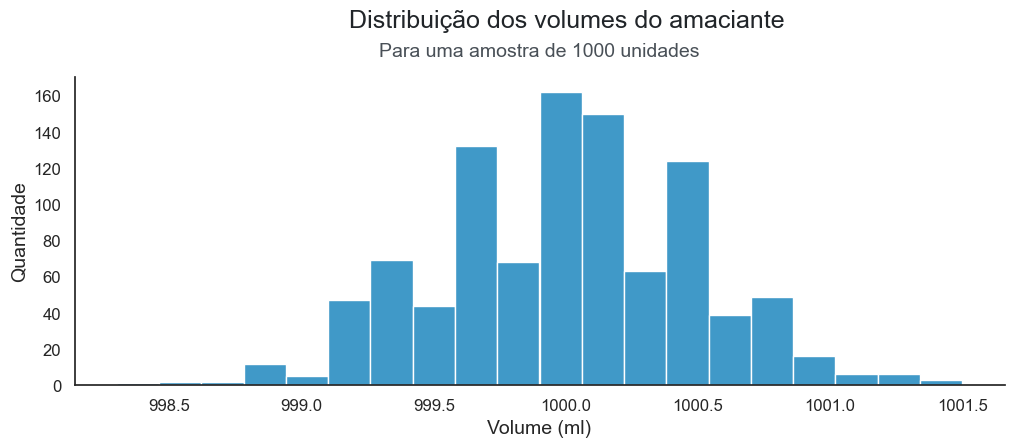

In [5]:
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.histplot(data=vol_amaciante, x='Volume', bins=20, color=AZUL2)

# Personalização do gráfico

plt.suptitle('Distribuição dos volumes do amaciante',
             size=18, color=CINZA1, x=0.535, y=1.05)
plt.title('Para uma amostra de 1000 unidades', fontsize=14,
          color=CINZA2, pad=15)
ax.set_xlabel('Volume (ml)', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12, color=CINZA2)
ax.yaxis.set_tick_params(labelsize=12, color=CINZA2)
sns.despine()

plt.show()

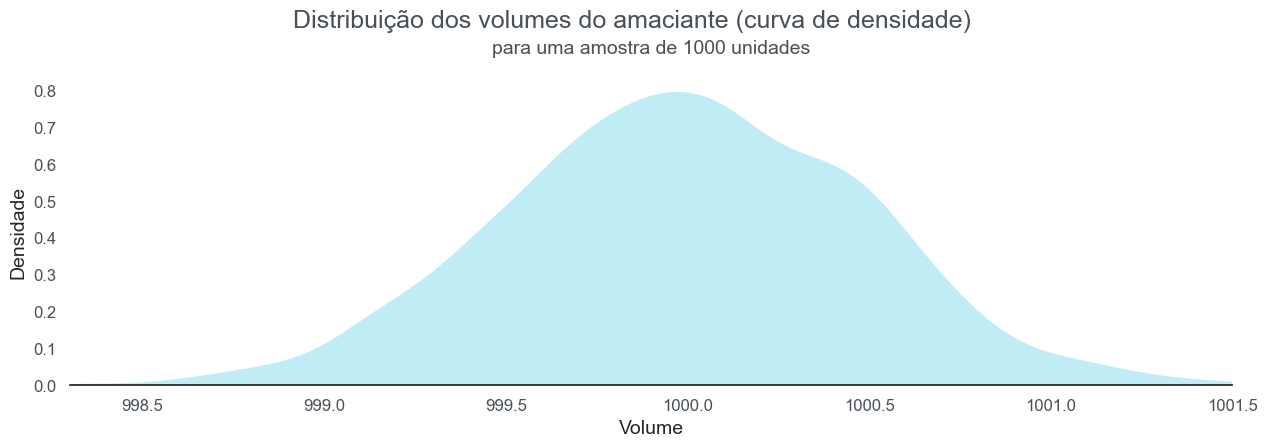

In [6]:
def grafico_densidade():
    sns.set_theme(style='white')
    fig, ax = plt.subplots(figsize=(15, 4))

    ax = sns.kdeplot(data=vol_amaciante,
                     x='Volume', color=AZUL3,
                     lw=0, fill=True)

    plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)',
                 size=18, color=CINZA2, x=0.5, y=1.05)
    plt.title('para uma amostra de 1000 unidades',
              fontsize=14, color=CINZA2, y=1.05)
    ax.set_xlabel('Volume', fontsize=14)
    ax.set_ylabel('Densidade', fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.set_xlim(vol_amaciante['Volume'].min(), vol_amaciante['Volume'].max())

    sns.despine(top=True, right=True, bottom=False, left=True)

    return ax


ax = grafico_densidade()

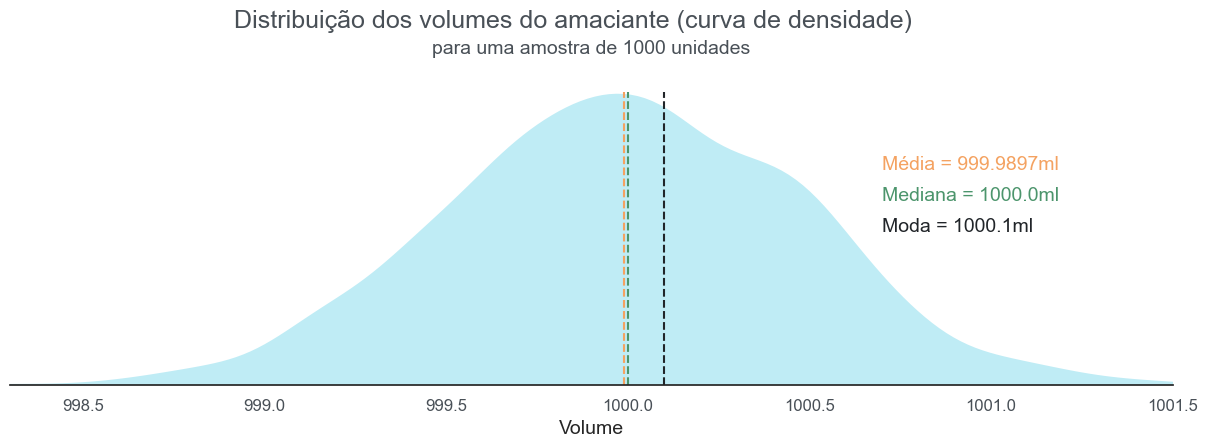

In [7]:
# Adicionando linhas ao gráfico

ax = grafico_densidade()

ax.set_ylabel('')
ax.set_yticklabels([])

estat = (vol_amaciante['Volume'].mean(),
         vol_amaciante['Volume'].median(),
         vol_amaciante['Volume'].mode()[0])

desc = ['Média',
        'Mediana',
        'Moda']

cores = [LARANJA1,
         VERDE1,
         CINZA1]

ax.vlines(x=estat, ymin=0, ymax=0.8,
          colors=cores, linestyles='--')

for i in range(0, len(estat)):
    ax.text(x=0.75, y=(0.7 - i/10), s=f'{desc[i]} = {estat[i]}ml',
            fontsize=14, color=cores[i], transform=ax.transAxes)


fig = ax.get_figure()

plt.show()

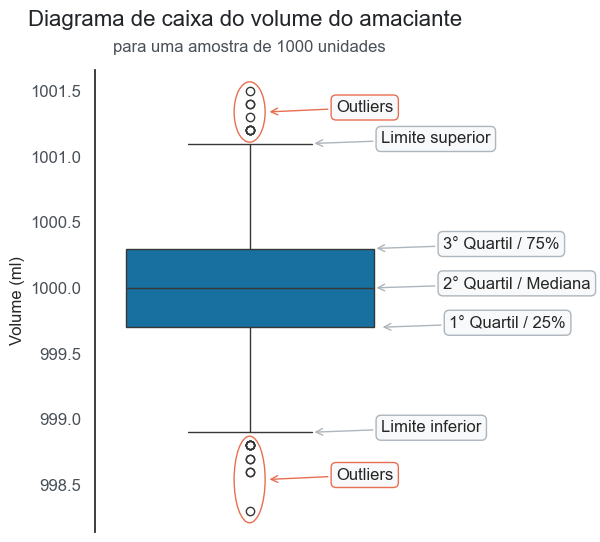

In [8]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(4, 6))

ax = sns.boxplot(data=vol_amaciante,
                 y='Volume', orient='v',
                 color=AZUL2)

plt.suptitle('Diagrama de caixa do volume do amaciante',
             size=16, color=CINZA1)
plt.title('para uma amostra de 1000 unidades', y=1.02, fontsize=12,
          color=CINZA2)

ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize=12)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
sns.despine(top=True, right=True, bottom=True)

y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.32),
                      width=0.1, height=0.46,
                      color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4),
                      width=0.1, height=0.66,
                      color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)

ax.annotate('Outliers', xy=(0 + 0.055, y_max - 0.32), xycoords='data',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color=VERMELHO1))

ax.annotate('Outliers',
            xy=(0 + 0.055, y_min + 0.4), xycoords='data',
            xytext=(50, 0), textcoords='offset points',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=VERMELHO1),
            arrowprops=dict(arrowstyle='->', color=VERMELHO1))

ax.annotate('1° Quartil / 25%',
            xy=(0.42, vol_amaciante['Volume'].quantile(q=0.25)), xycoords='data',
            xytext=(50, 0), textcoords='offset points',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3),
            arrowprops=dict(arrowstyle='->', color=CINZA3))

ax.annotate('2° Quartil / Mediana',
            xy=(0.4, vol_amaciante['Volume'].quantile(q=0.5)), xycoords='data',
            xytext=(50, 0), textcoords='offset points',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3),
            arrowprops=dict(arrowstyle='->', color=CINZA3))

ax.annotate('3° Quartil / 75%',
            xy=(0.4, vol_amaciante['Volume'].quantile(q=0.75)), xycoords='data',
            xytext=(50, 0), textcoords='offset points',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3),
            arrowprops=dict(arrowstyle='->', color=CINZA3))

ax.annotate('Limite superior',
            xy=(0.2, vol_amaciante['Volume'].quantile(q=0.99)), xycoords='data',
            xytext=(50, 0), textcoords='offset points',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3),
            arrowprops=dict(arrowstyle='->', color=CINZA3))

ax.annotate('Limite inferior',
            xy=(0.2, vol_amaciante['Volume'].quantile(q=0.015)), xycoords='data',
            xytext=(50, 0), textcoords='offset points',
            bbox=dict(boxstyle='round', fc=CINZA5, ec=CINZA3),
            arrowprops=dict(arrowstyle='->', color=CINZA3))

plt.show()